## Modelo Hierarchical

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')



In [7]:
 # Lectura de datos en Python para cargarlos en la variable Datos
Datos = pd.read_csv('D:/UNAD/Evidencias de Aprendizaje/Semestre 9/Análisis de Datos/Tarea 4/DataSet/Mall_Customers.csv')

In [8]:
# Se realizo lectura de los datos para el análisis exploratorio
Datos.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
#Descripcion de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipicos')

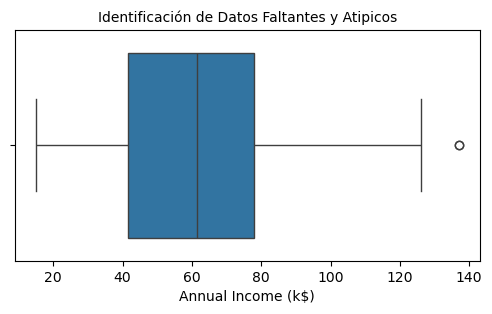

In [12]:
# Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atipicos', fontsize=10 )

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [13]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Age: ", Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Annual Income (k$): ", Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100): ", Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Annual Income (k$):  0
Cantidad de Registros con cero en Spending Score (1-100):  0


In [14]:
#Remplazar todos los ceros con el valor medio (promedio de la columna.
Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atipicos')

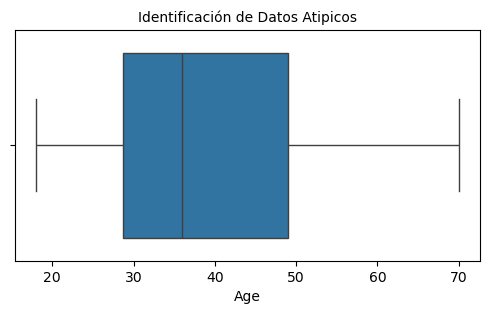

In [15]:
#Identificacion de Datos Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atipicos', fontsize=10 )

In [16]:
# Conteo de datos Atípicos
nivel_minimo=18
nivel_maximo=70
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print(" * El total de datos atípicos es {}".format(Total_Atipicos))

 * El total de datos atípicos es 0


In [17]:
#Filtra Datos Atipicos
Datos= Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [18]:
# Revision del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              194 non-null    int64 
 1   Gender                  194 non-null    object
 2   Age                     194 non-null    int64 
 3   Annual Income (k$)      194 non-null    int64 
 4   Spending Score (1-100)  194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.1+ KB


Nos percatamos de que no poseemos datos en blanco ya que todas las columnas tienen 200 observaciones, también no hay datos atípicos por lo que podemos iniciar a entrenar el modelo.


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

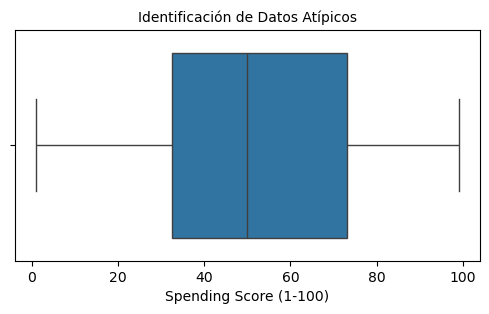

In [19]:
# Identificación de datos atípicos Spending Score (1-100).

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [21]:
# Conteo de datos Atípicos
nivel_minimo=1
nivel_maximo=100
Total_Atipicos=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print(" * El total de datos atípicos es {}".format(Total_Atipicos))

 * El total de datos atípicos es 0


In [22]:
#Filtra Datos Atipicos
Datos= Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [23]:
# Revision del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              194 non-null    int64 
 1   Gender                  194 non-null    object
 2   Age                     194 non-null    int64 
 3   Annual Income (k$)      194 non-null    int64 
 4   Spending Score (1-100)  194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.1+ KB


Nos percatamos de que no poseemos datos en blanco ya que todas las columnas tienen 200 observaciones, también no hay datos atípicos por lo que podemos iniciar a entrenar el modelo.


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Caracteristicas de interes para el agrupamiento
* Edad (age)
* ingreso (Annual Income (k$))
* Puntaje de Gasto (Spending Score)



In [24]:
# Filtrar columnas del modelo
Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [25]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


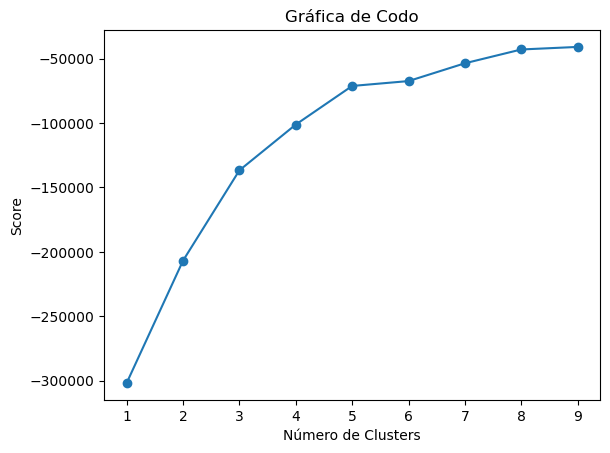

In [26]:
# Se realiza gráfica de codo para identificar valor de los clusters (K)

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros

In [28]:
# Estandarizar los datos
scaler = StandardScaler()
scaled_Datos = scaler.fit_transform(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])



## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

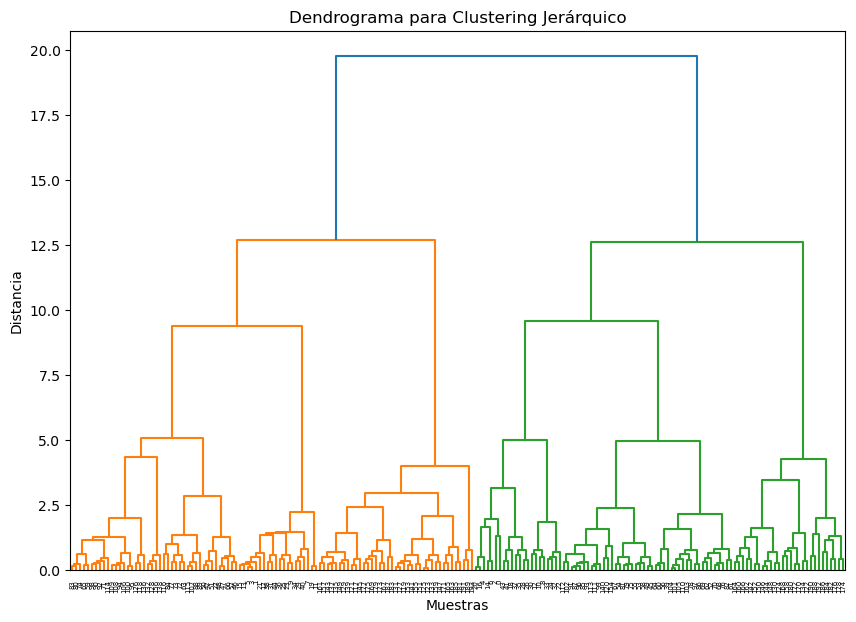

In [29]:
scaled_data = np.nan_to_num(scaled_Datos)  # Reemplaza valores NaN, inf y -inf con valores finitos


linked = linkage(scaled_Datos, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

In [30]:
Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']] = Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].fillna(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_Datos = scaler.fit_transform(Datos[['Annual Income (k$)', 'Age', 'Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_Datos)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_Datos, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_Datos, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_Datos, labels)
print(f"Índice de Davies-Bouldin: {db_score}")



Coeficiente de Silhouette: 0.3198892109695207
Índice de Calinski-Harabasz: 85.78030045266824
Índice de Davies-Bouldin: 1.13240702643368


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

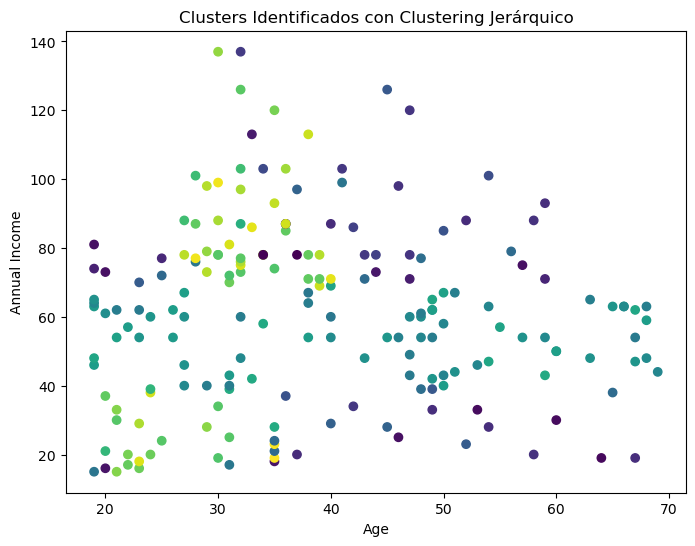

In [32]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=6)  # Ajustar el número de clusters
Datos['Cluster'] = model.fit_predict(scaled_Datos)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Age'], Datos['Annual Income (k$)'], c=Datos['Spending Score (1-100)'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

Silhouette Score: 0.4135800612561933


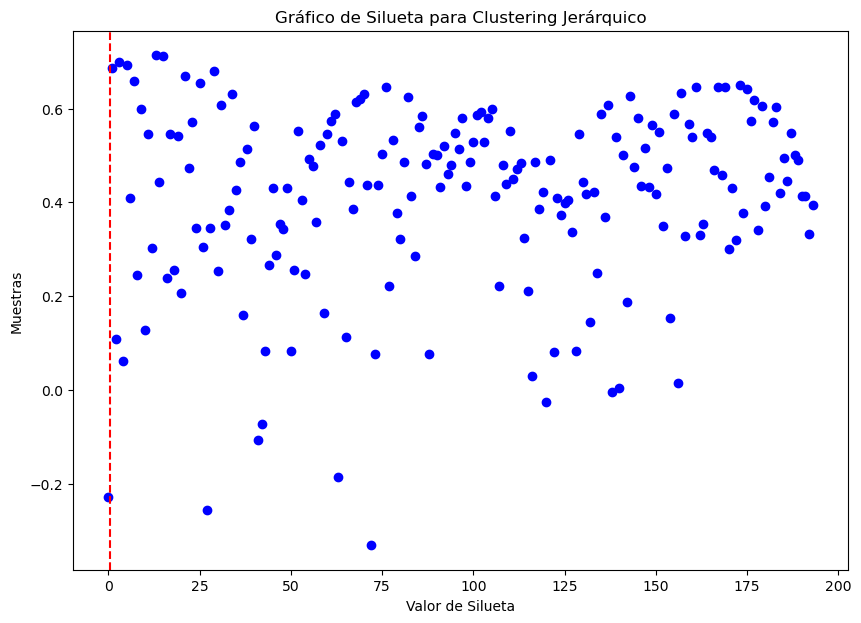

In [33]:


from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_Datos, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

